MENTORNESS INTERNSHIP PROGRAM
Task 2

Batch Name: MIP-ML-08

# Project Name: Customer Churn Prediction

**By Md. Harun-Or-Rashid Khan**

Problem Statement: 
Customer churn is a crucial concern for businesses across sectors. Understanding customer behaviors, 
identifying key factors contributing to churn, and predicting when customers are likely to churn are vital 
for reducing revenue loss and enhancing customer retention strategies. 

Problem Type: Classification Supervised ML 

Dataset : The dataset contains the following columns: 
`customerID`: Customer ID 
`gender`: Customer's gender 
`SeniorCitizen`: Whether the customer is a senior citizen (1 for yes, 0 for no) 
`Partner`: Whether the customer has a partner 
`Dependents`: Whether the customer has dependents 
`tenure`: Number of months the customer has stayed with the company 
`PhoneService`: Whether the customer has phone service 
`MultipleLines`: Whether the customer has multiple phone lines 
`InternetService`: Type of internet service 
`OnlineSecurity`: Whether the customer has online security 
`OnlineBackup`: Whether the customer has online backup 
`DeviceProtection`: Whether the customer has device protection 
`TechSupport`: Whether the customer has tech support 
`StreamingTV`: Whether the customer streams TV 
`StreamingMovies`: Whether the customer streams movies 
`Contract`: Type of contract (e.g., month-to-month, one year, two years) 
`PaperlessBilling`: Whether the customer uses paperless billing 
`PaymentMethod`: Payment method (e.g., electronic check, mailed check) 
`MonthlyCharges`: Monthly charges 
`TotalCharges`: Total charges 
`Churn`: Target variable, indicating whether the customer churned (1 for yes, 0 for no)

# Mission: 
In this internship is to leverage machine learning to predict customer churn. You will follow 
these key steps: 

1. Data Preprocessing: Prepare the data for model training. This includes handling missing values, 
encoding categorical variables, and scaling or normalizing features as needed.

2. Exploratory Data Analysis (EDA): Dive into the dataset, conduct comprehensive EDA, and unveil 
valuable insights about customer behaviors. EDA will involve data visualization, summary 
statistics, and identifying patterns in the data.

3. Feature Engineering: If requires create new features or transform existing ones that can provide 
additional insights or improve model performance. Feature engineering might involve 
aggregating information, creating interaction terms, or applying domain-specific knowledge. 

4. Machine Learning Model Development: Train various machine learning models for 
classification, such as logistic regression, decision trees, random forests, Boosting Algorithms. 
Experiment with different algorithms to find the best-performing model. 

5. Model Evaluation: Assess the performance of your models using appropriate evaluation metrics 
like accuracy, precision, recall, F1-score, confusion matrix and ROC AUC. Identify the model that 
provides the most accurate predictions of customer churn.

6. Predicting Churn: Once you've built and validated your model, use it to predict customer churn. 
Understand the importance of feature importance scores in interpreting the model's 
predictions.

7. Recommendations: Based on your findings, provide actionable recommendations to the business. These 
recommendations should help reduce churn and improve customer retention strategies. 

In [108]:
# Import libraries for understand the dataset
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  

import missingno as msno 
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [109]:
# read the dataset 
path = r"G:\certificate-25\Mentorness\Task2\Customer_Churn.csv"
df = pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [110]:
df.shape

(7043, 21)

# Data Preprocessing

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation: Individual checking of 'CustomerID', 'SeniorCitizen',and 'TotalCharges'.

In [112]:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [113]:
# This number are not follow any pattrn. So delete it.
df.drop(columns = 'customerID', inplace = True)

In [114]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [115]:
df['SeniorCitizen'].isnull().sum()

0

In [116]:
# 'SeniorCitizen' feature has binary. So, change its category.
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No', 1:'Yes'})

In [117]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [118]:
# 'TotalCharges' feature has string plus object. So change its data type.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

                  Null Count  Null_Percentage
gender                     0             0.00
SeniorCitizen              0             0.00
Partner                    0             0.00
Dependents                 0             0.00
tenure                     0             0.00
PhoneService               0             0.00
MultipleLines              0             0.00
InternetService            0             0.00
OnlineSecurity             0             0.00
OnlineBackup               0             0.00
DeviceProtection           0             0.00
TechSupport                0             0.00
StreamingTV                0             0.00
StreamingMovies            0             0.00
Contract                   0             0.00
PaperlessBilling           0             0.00
PaymentMethod              0             0.00
MonthlyCharges             0             0.00
TotalCharges              11             0.16
Churn                      0             0.00


<Figure size 1000x1000 with 0 Axes>

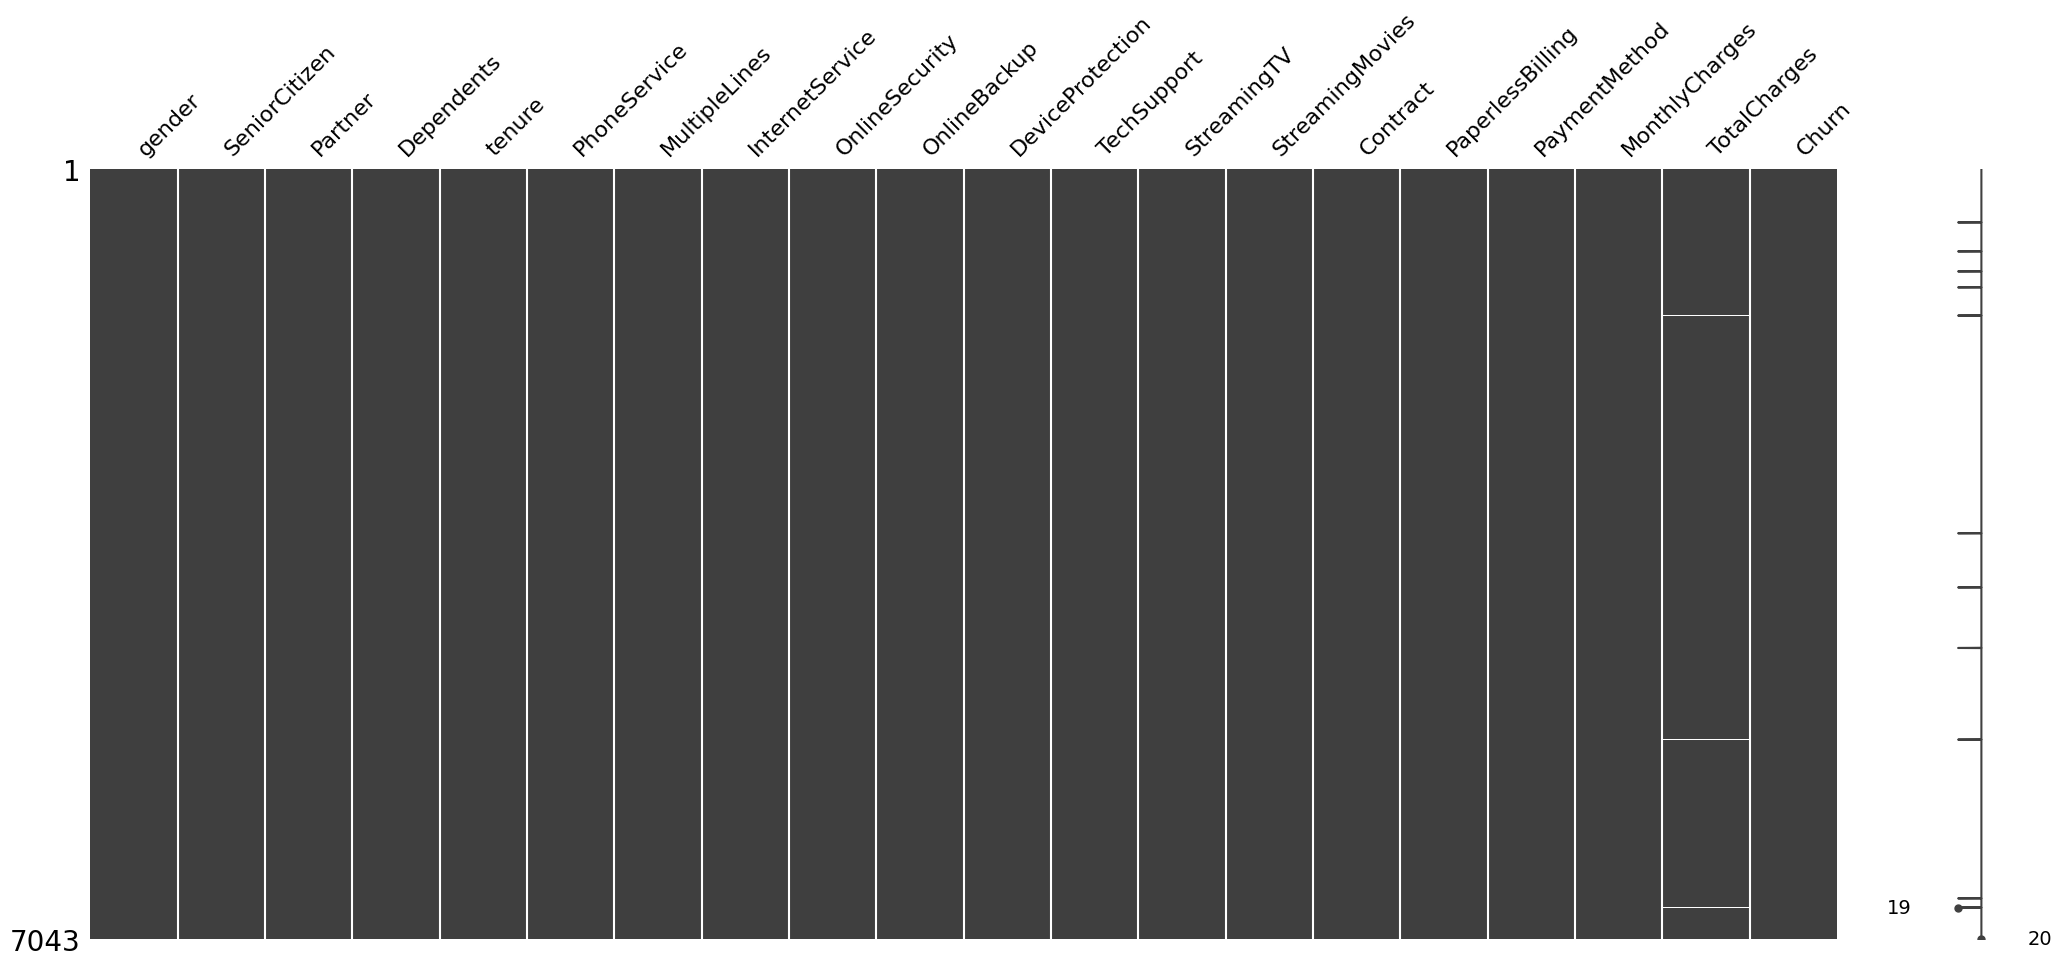

In [119]:
# Find null values with plot
null_counts = df.isnull().sum()
null_per = ((df.isnull().sum()/len(df))*100).round(2)

result_df = pd.DataFrame({'Null Count':null_counts, 'Null_Percentage':null_per})
print(result_df)
 
plt.figure(figsize=(10,10))
msno.matrix(df)
plt.show()

Observation : 'TotalCharges' features null values below 5% so, remove null.

In [120]:
df.dropna(inplace = True)

In [121]:
df.shape

(7032, 20)

In [122]:
for col in df.describe(include='object').columns:
      print(col)
      print(df[col].unique())
      print('-'*50)

gender
['Female' 'Male']
--------------------------------------------------
SeniorCitizen
['No' 'Yes']
--------------------------------------------------
Partner
['Yes' 'No']
--------------------------------------------------
Dependents
['No' 'Yes']
--------------------------------------------------
PhoneService
['No' 'Yes']
--------------------------------------------------
MultipleLines
['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity
['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup
['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection
['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport
['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV
['No' 'Yes' 'No in

Observation: No anomaly data are not present.

In [123]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Observation: Maybe no outliers presents. Also tenure*MonthlyCharges = TotalCharges.

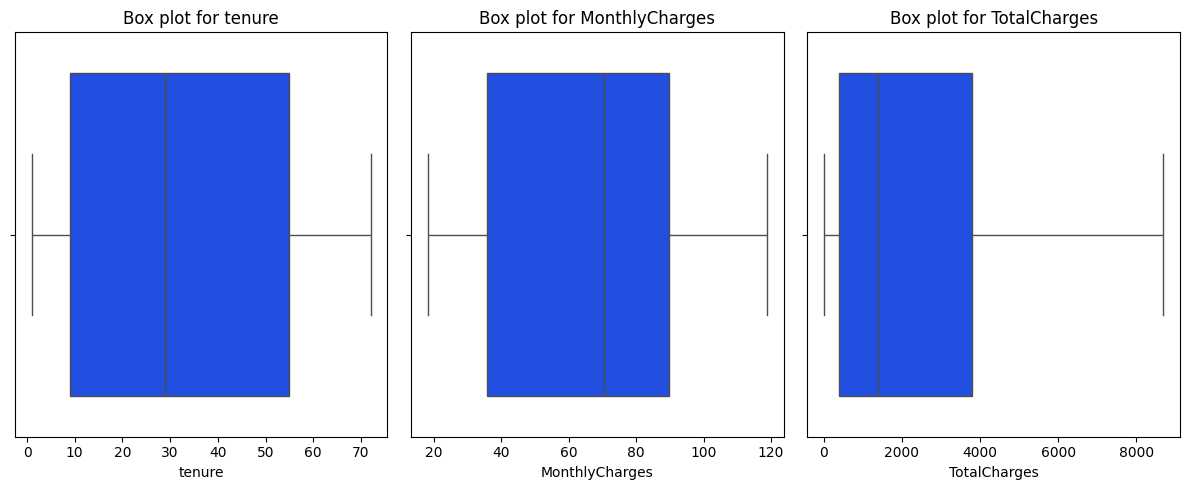

In [124]:
# For outlier
num_to_plot = ['tenure','MonthlyCharges','TotalCharges']

plt.figure(figsize=(12,5))

for i, col in enumerate(num_to_plot,1):
      plt.subplot(1,3,i)
      sns.boxplot(x = df[col], palette='bright')
      plt.title(f"Box plot for {col}")
plt.tight_layout()
plt.show()

# Exploratory Data Analysis (EDA)

In [125]:
# Univeriate Analysis- First separate the features

cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include='number').columns

print(f'Categorical_feature={cat_features} \n Numerical_features={num_features}')


Categorical_feature=Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object') 
 Numerical_features=Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


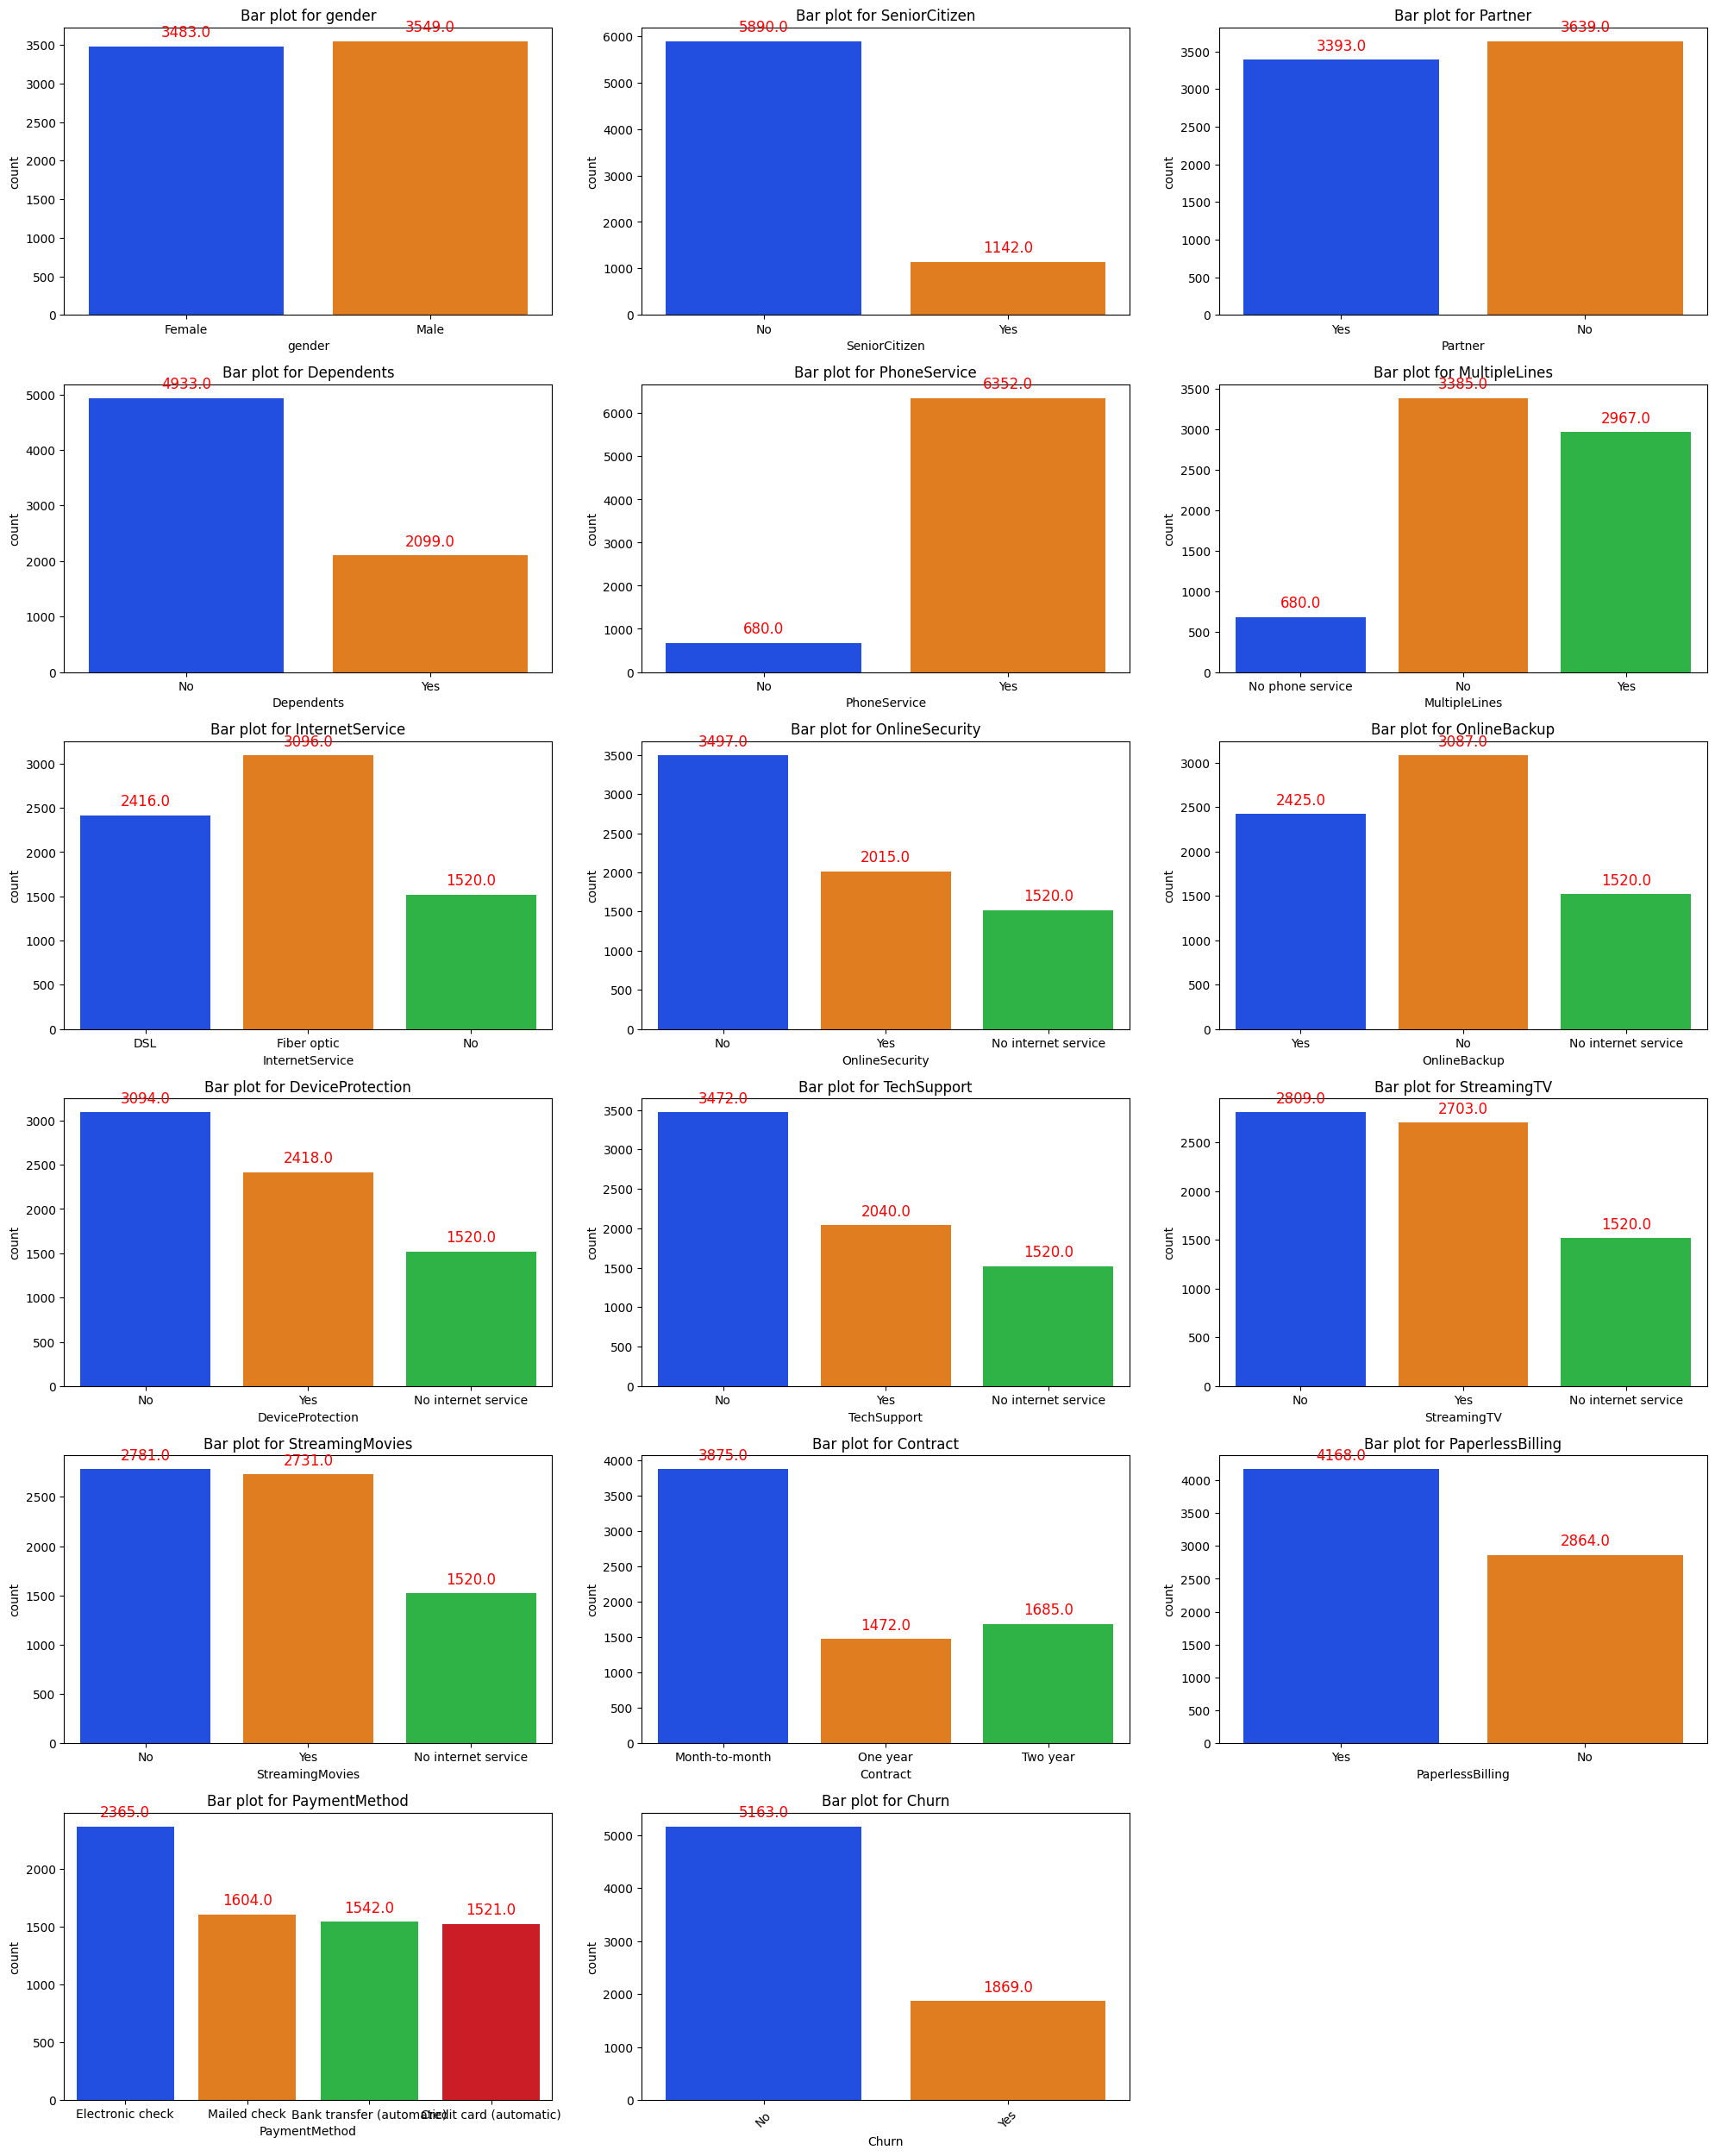

In [126]:
cat_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=(20,25))

for i, col in enumerate(cat_to_plot,1):
      plt.subplot(6,3,i)
      ax = sns.countplot(x=df[col], palette='bright')
      plt.title(f"Bar plot for {col}")

    # Annotating the counts
      for j in ax.patches:
        height = j.get_height()
        ax.annotate(f'{height}', (j.get_x() + j.get_width() / 2., height), ha='center',
                    va='bottom', fontsize=12, color='red', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

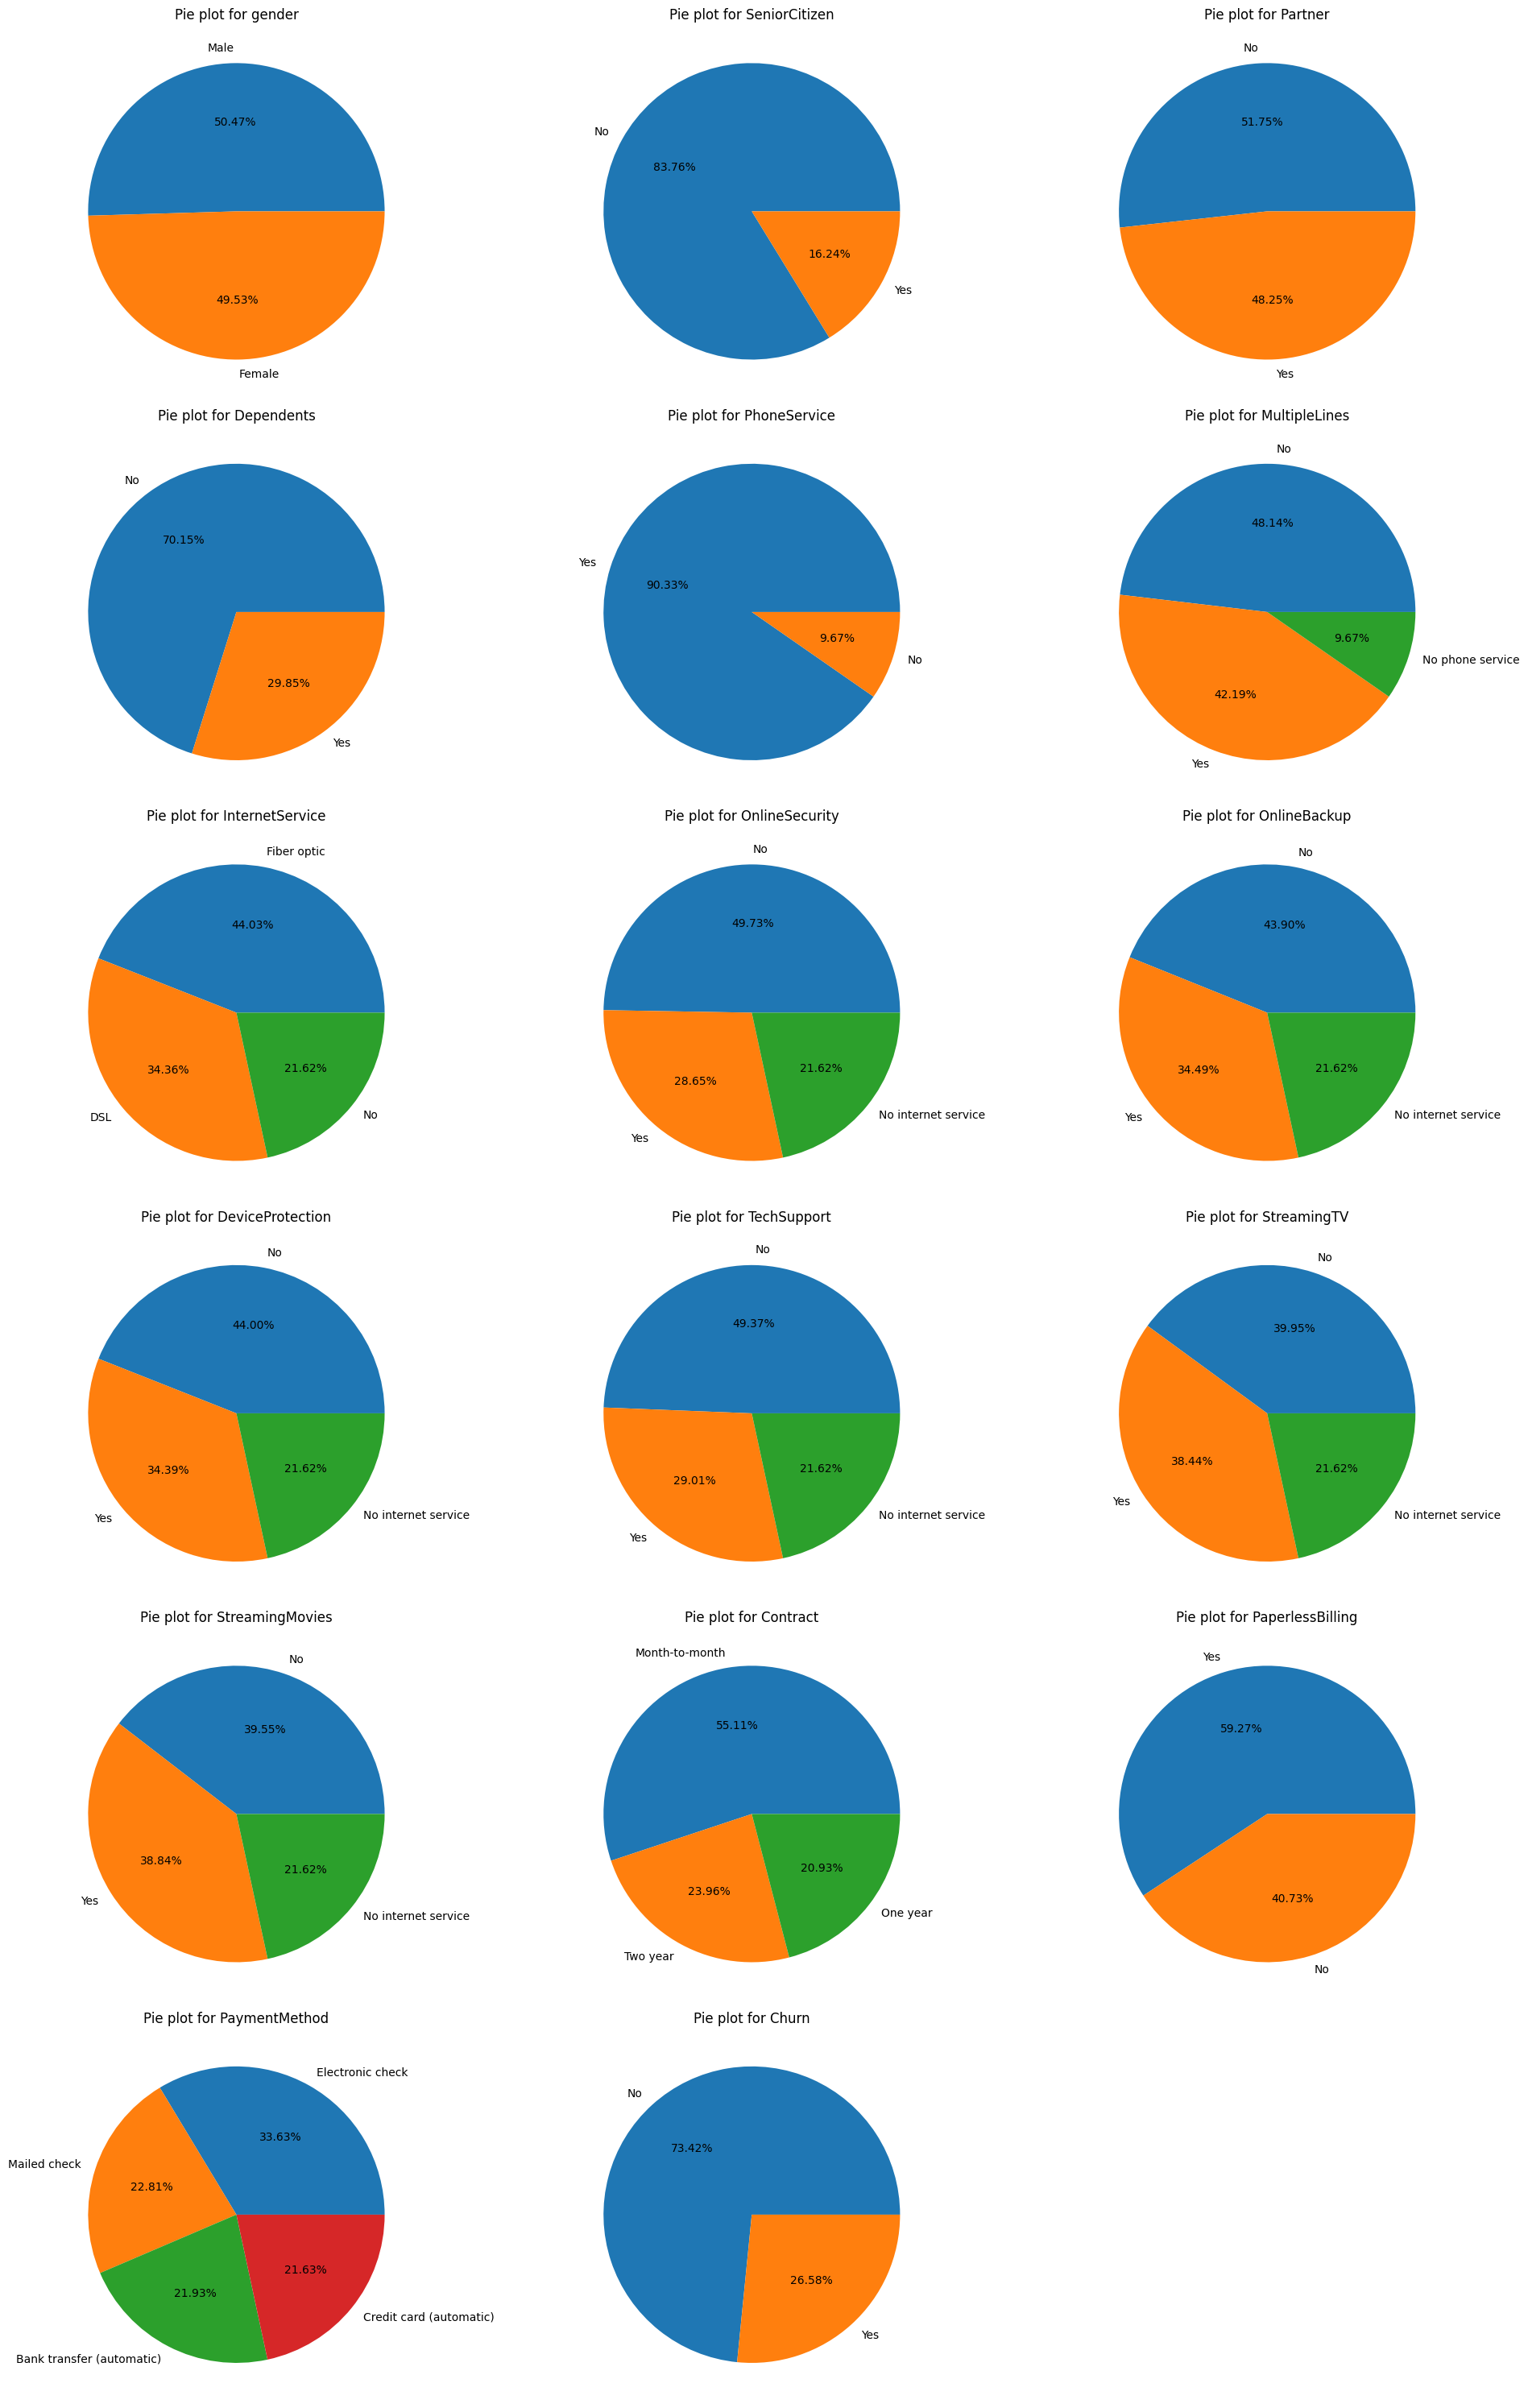

In [127]:
cat_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=(20,30))

for i, col in enumerate(cat_to_plot,1):
    plt.subplot(6,3,i)
    values = df[col].value_counts()
    ax = plt.pie(x=values, labels=values.index, autopct='%1.2f%%')
    plt.title(f"Pie plot for {col}")

plt.tight_layout()
plt.show()

**Observation** 

Company's customer behavior does not significantly differ based on gender, partnership status, or age; however, fewer senior citizens tend to utilize the service.

The majority of customers do not opt for online security, multiple lines, online backup, device protection, tech support, streaming TV, or streaming movies.

Most customers prefer fiber optic internet connection, phone service, month-to-month contracts, paperless billing, and electronic payment methods.

Churn rate is 26.58%. 

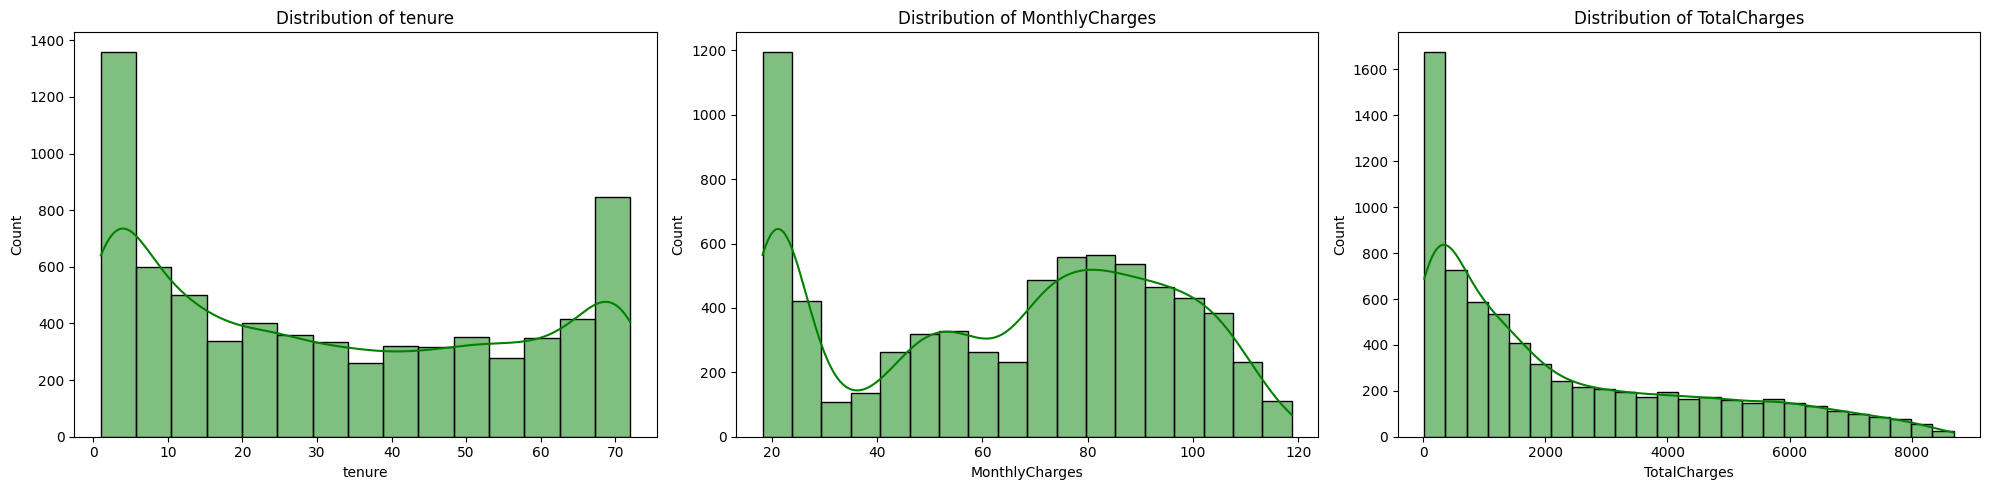

In [128]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(20, 5))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, color='green')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [129]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

from scipy import stats
for col in numerical_features:
      skewness = df[col].skew()
      if skewness >0:
            skew_type = "Right Skewed"
      elif skewness <0:
            skew_type = "Left Skewed"
      else:
            skew_type = "Approximately Normal"
      print(f'Features = {col} : skewness = {skewness} Distribution = {skew_type}')         

Features = tenure : skewness = 0.23773083190513133 Distribution = Right Skewed
Features = MonthlyCharges : skewness = -0.22210292770166232 Distribution = Left Skewed
Features = TotalCharges : skewness = 0.9616424997242504 Distribution = Right Skewed


Observation: TotalCharges features are highly Right Skewed. In the feature Engineering section, it would convert to normal. 

# Bivariate Analysis

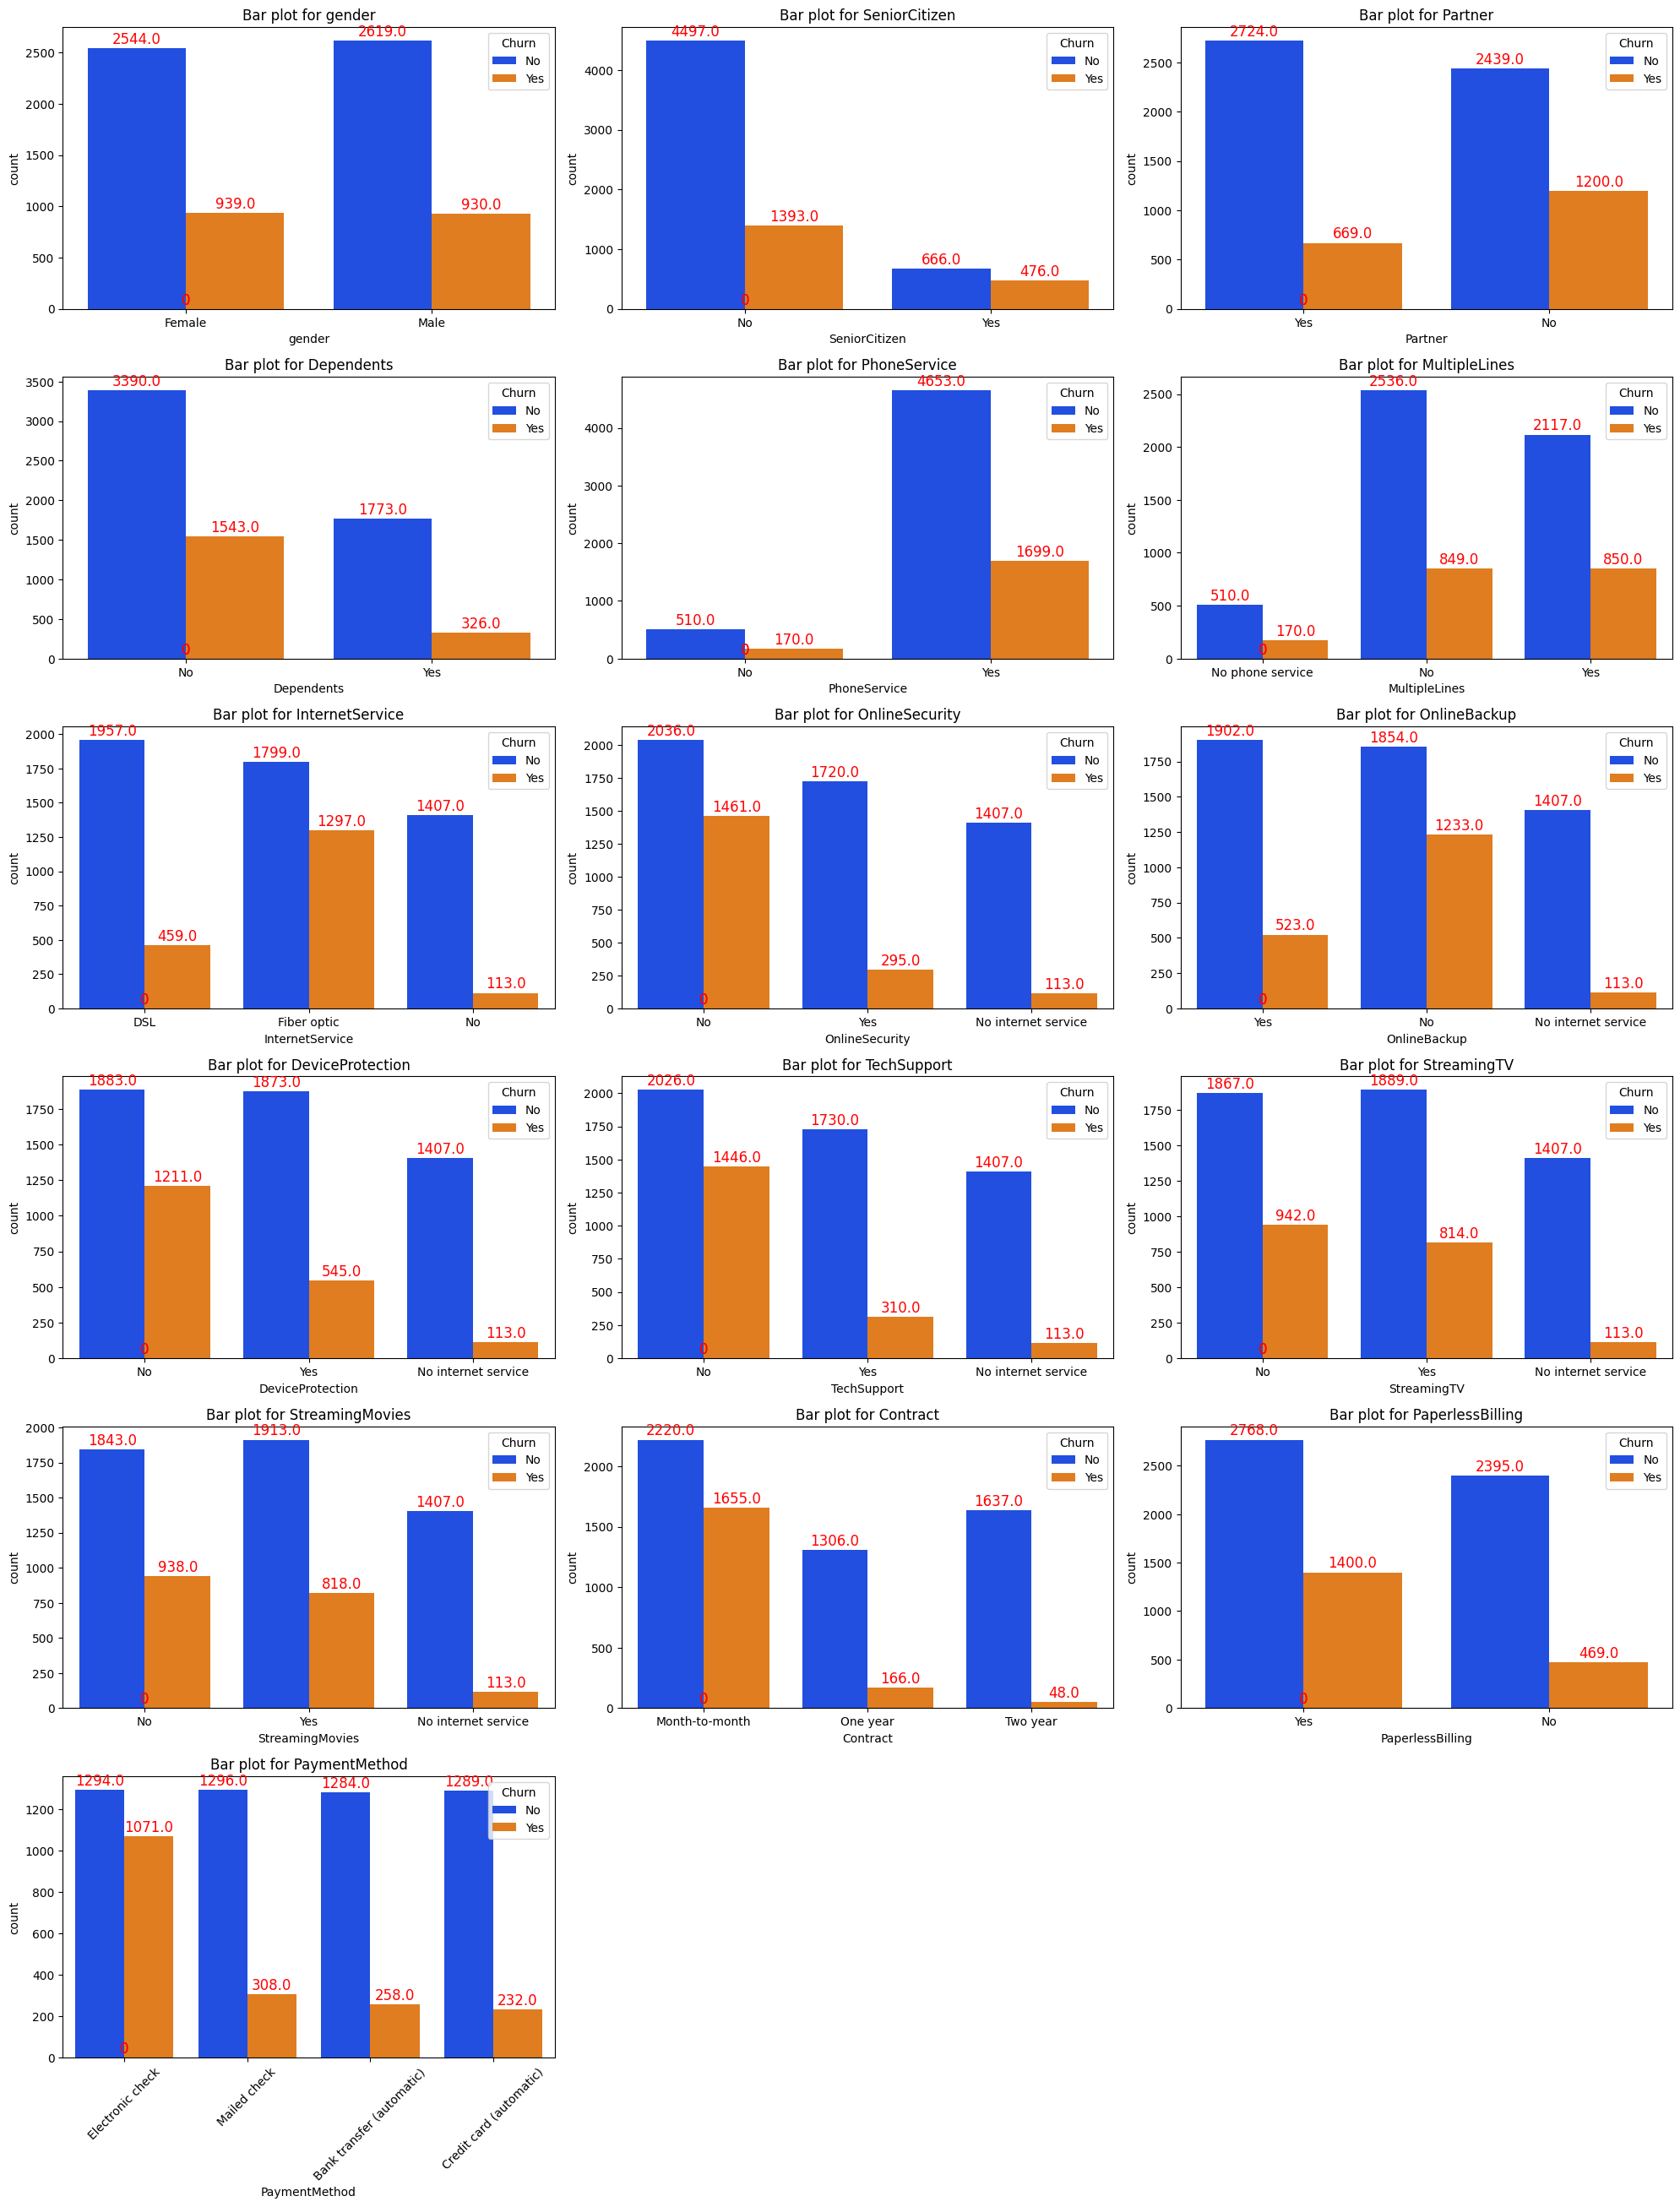

In [130]:
cat_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
               'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(20, 25))

for i, col in enumerate(cat_to_plot, 1):
    plt.subplot(6, 3, i)
    ax = sns.countplot(x=col, data=df, hue='Churn', palette='bright')
    plt.title(f"Bar plot for {col}")
    
    # Annotating the counts
    for j in ax.patches:
        height = j.get_height()
        ax.annotate(f'{height}', (j.get_x() + j.get_width() / 2., height), ha='center',
                    va='bottom', fontsize=12, color='red', xytext=(0, 1),
                    textcoords='offset points')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


**Observation:** The churn rate is higher among customers who did not utilize support, streaming TV, streaming movies, device protection, online backup, online security, multiple lines, dependents, or partners. Additionally, customers who used phone services, electronic check for payment, paperless billing, or opted for month-to-month contracts showed higher churn rates.

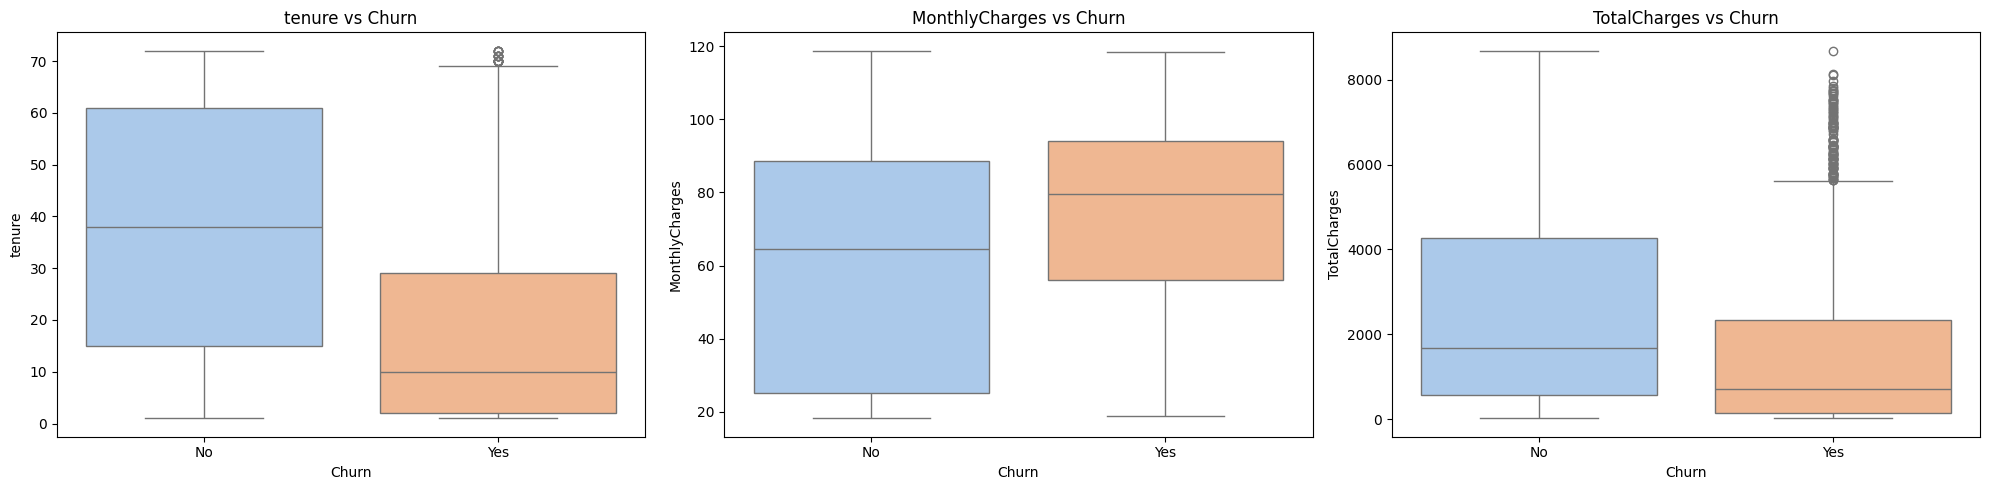

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(20, 5))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=col, data=df, palette='pastel')
    plt.title(f'{col} vs Churn')

plt.tight_layout()
plt.show()


**Observation:** It appears that the product of tenure and MonthlyCharges equals TotalCharges. Therefore, it is advisable to drop both tenure and MonthlyCharges from the analysis.

# Feature Engineering

In [132]:
df1 = df.copy()

In [133]:
# Since 'tenure'*'MonthlyCharges'='TotalCharges'. So remove 'tenure' and 'MonthlyCharges'
df1.drop(columns=['tenure','MonthlyCharges'], inplace= True)

In [134]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [135]:
from scipy.stats import boxcox

# Apply Box-Cox transformation to 'MonthlyCharges' column
df1['TotalCharges'], _ = boxcox(df1['TotalCharges'])

# Check the transformed 'MonthlyCharges' column
print(df1['TotalCharges'].skew())

-0.1457578689928088


In [136]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Churn'] = le.fit_transform(df1['Churn'])

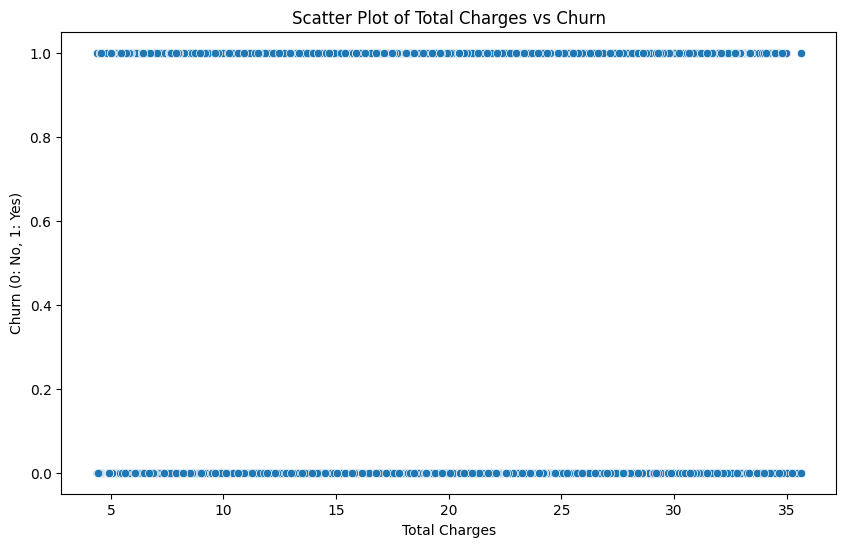

In [137]:
plt.figure(figsize=(10, 6))

# Create scatter plot for 'TotalCharges' vs 'Churn_numeric'
sns.scatterplot(x='TotalCharges', y='Churn', data=df1, palette='Set1')

plt.title('Scatter Plot of Total Charges vs Churn')
plt.xlabel('Total Charges')
plt.ylabel('Churn (0: No, 1: Yes)')

plt.show()

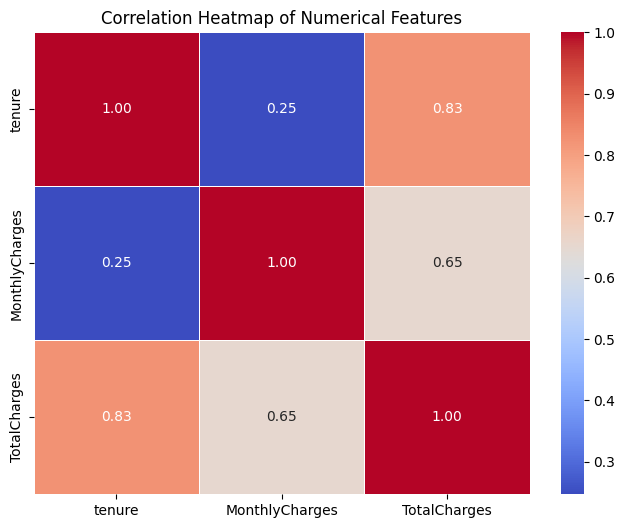

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Compute the correlation matrix
correlation = df[numerical_features].corr()

plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [139]:
from scipy.stats import chi2_contingency

# Initialize an empty list to store the results
results = []

# Iterate over each categorical feature in df1
for feature in df.select_dtypes(include='object').columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    
    # Perform chi-square test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Determine whether to accept or reject null hypothesis based on p-value
    if p_value <= 0.05:  # Using a significance level of 0.05
        hypothesis_status = 'Reject Null Hypothesis'
    else:
        hypothesis_status = 'Accept Null Hypothesis'
    
    # Append the results to the list
    results.append({'Feature': feature,
                    'Chi-squared statistic': round(chi2, 2),
                    'p-value': round(p_value, 6),
                    'Hypothesis Status': hypothesis_status})

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)

             Feature  Chi-squared statistic   p-value       Hypothesis Status
0             gender                   0.48  0.490488  Accept Null Hypothesis
1      SeniorCitizen                 158.44  0.000000  Reject Null Hypothesis
2            Partner                 157.50  0.000000  Reject Null Hypothesis
3         Dependents                 186.32  0.000000  Reject Null Hypothesis
4       PhoneService                   0.87  0.349924  Accept Null Hypothesis
5      MultipleLines                  11.27  0.003568  Reject Null Hypothesis
6    InternetService                 728.70  0.000000  Reject Null Hypothesis
7     OnlineSecurity                 846.68  0.000000  Reject Null Hypothesis
8       OnlineBackup                 599.18  0.000000  Reject Null Hypothesis
9   DeviceProtection                 555.88  0.000000  Reject Null Hypothesis
10       TechSupport                 824.93  0.000000  Reject Null Hypothesis
11       StreamingTV                 372.46  0.000000  Reject Nu

In [140]:
from scipy.stats import f_oneway

# Define the numerical features and the categorical features
numerical_features = ['tenure','MonthlyCharges','TotalCharges']
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Initialize an empty list to store the results
anova_results = []

# Iterate over each categorical feature
for cat_feature in categorical_features:
    # Iterate over each numerical feature
    for num_feature in numerical_features:
        # Group the numerical data by the categorical feature
        groups = df.groupby(cat_feature)[num_feature].apply(list)
        
        # Perform ANOVA test
        f_statistic, p_value = f_oneway(*groups)
        
        # Determine whether to accept or reject null hypothesis based on p-value
        if p_value <= 0.05:  # Using a significance level of 0.05
            hypothesis_status = 'Reject Null Hypothesis'
        else:
            hypothesis_status = 'Accept Null Hypothesis'
        
        # Append the results to the list
        anova_results.append({'Categorical Feature': cat_feature,
                              'Numerical Feature': num_feature,
                              'F-statistic': round(f_statistic, 2),
                              'p-value': round(p_value, 6),
                              'Hypothesis Status': hypothesis_status})

# Convert the list of dictionaries to a DataFrame
anova_results_df = pd.DataFrame(anova_results)

# Display the ANOVA results DataFrame
anova_results_df

,Categorical Feature,Numerical Feature,F-statistic,p-value,Hypothesis Status
0,gender,tenure,0.20,0.657665,Accept Null Hypothesis
1,gender,MonthlyCharges,1.34,0.247950,Accept Null Hypothesis
2,gender,TotalCharges,0.00,0.996800,Accept Null Hypothesis
3,SeniorCitizen,tenure,1.73,0.188504,Accept Null Hypothesis
4,SeniorCitizen,MonthlyCharges,357.13,0.000000,Reject Null Hypothesis
5,SeniorCitizen,TotalCharges,74.51,0.000000,Reject Null Hypothesis
6,Partner,tenure,1200.47,0.000000,Reject Null Hypothesis
7,Partner,MonthlyCharges,67.93,0.000000,Reject Null Hypothesis
8,Partner,TotalCharges,796.83,0.000000,Reject Null Hypothesis
9,Dependents,tenure,192.81,0.000000,Reject Null Hypothesis


In [141]:
from scipy.stats import f_oneway

# Define the numerical features and the categorical features
numerical_features = ['TotalCharges']
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Initialize an empty list to store the results
anova_results = []

# Iterate over each categorical feature
for cat_feature in categorical_features:
    # Iterate over each numerical feature
    for num_feature in numerical_features:
        # Group the numerical data by the categorical feature
        groups = df.groupby(cat_feature)[num_feature].apply(list)
        
        # Perform ANOVA test
        f_statistic, p_value = f_oneway(*groups)
        
        # Determine whether to accept or reject null hypothesis based on p-value
        if p_value <= 0.05:  # Using a significance level of 0.05
            hypothesis_status = 'Reject Null Hypothesis'
        else:
            hypothesis_status = 'Accept Null Hypothesis'
        
        # Append the results to the list
        anova_results.append({'Categorical Feature': cat_feature,
                              'Numerical Feature': num_feature,
                              'F-statistic': round(f_statistic, 2),
                              'p-value': round(p_value, 6),
                              'Hypothesis Status': hypothesis_status})

# Convert the list of dictionaries to a DataFrame
anova_results_df = pd.DataFrame(anova_results)

# Display the ANOVA results DataFrame
anova_results_df

,Categorical Feature,Numerical Feature,F-statistic,p-value,Hypothesis Status
0,gender,TotalCharges,0.00,0.9968,Accept Null Hypothesis
1,SeniorCitizen,TotalCharges,74.51,0.0000,Reject Null Hypothesis
2,Partner,TotalCharges,796.83,0.0000,Reject Null Hypothesis
3,Dependents,TotalCharges,29.51,0.0000,Reject Null Hypothesis
4,PhoneService,TotalCharges,90.94,0.0000,Reject Null Hypothesis
5,MultipleLines,TotalCharges,993.33,0.0000,Reject Null Hypothesis
6,InternetService,TotalCharges,796.69,0.0000,Reject Null Hypothesis
7,OnlineSecurity,TotalCharges,1071.93,0.0000,Reject Null Hypothesis
8,OnlineBackup,TotalCharges,1494.26,0.0000,Reject Null Hypothesis
9,DeviceProtection,TotalCharges,1576.45,0.0000,Reject Null Hypothesis


Remark: This suggests that both 'gender' and 'Dependents' are not useful for predicting the target variable and can be safely dropped from the dataset without losing important predictive information.

In [142]:
# Drop the features
df1.drop(columns=['gender','Dependents'], inplace=True)

# Model Building

In [143]:
cat_features = df1.select_dtypes(include='object').columns
num_features = df1.select_dtypes(include='number').columns

print(f'Categorical_feature={cat_features} \n Numerical_features={num_features}')

Categorical_feature=Index(['SeniorCitizen', 'Partner', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object') 
 Numerical_features=Index(['TotalCharges', 'Churn'], dtype='object')


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

# Assuming df, numeric_features, categorical_features, and ordinal_feature are defined

X = df1.drop(['Churn'], axis=1)
y = df1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

numeric_features = ['TotalCharges']
categorical_features = ['SeniorCitizen', 'Partner',  'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
        ]
    )

LogisticRegression

In [145]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Fit the pipeline on your data and target variable
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TotalCharges']),
                                                 ('cat', OneHotEncoder(),
                                                  ['SeniorCitizen', 'Partner',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [146]:
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

accuracy_train_lgr = accuracy_score(y_train,y_pred_train)
accuracy_test_lgr = accuracy_score(y_test,y_pred_test)
cm = confusion_matrix(y_test,y_pred_test)

print("Accuracy on train-lgr :", accuracy_train_lgr)
print("Accuracy on test-lgr :", accuracy_test_lgr)
print("Confusion Matrix-lgr :\n", cm)
print("For LogisticRegression:", classification_report(y_test,y_pred_test))

Accuracy on train-lgr : 0.8116619260463226
Accuracy on test-lgr : 0.8052132701421801
Confusion Matrix-lgr :
 [[1416  139]
 [ 272  283]]
For LogisticRegression:               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1555
           1       0.67      0.51      0.58       555

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.81      0.80      2110



In [147]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.81307747 0.80454869 0.80227596 0.80156472 0.8200569 ]
Mean Accuracy: 0.8083047473463812


# 2. RandomForestClassifier

In [148]:
# Create a pipeline with ColumnTransformer and a Random Forest classifier
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

# Fit the pipeline on your data and target variable
rf_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TotalCharges']),
                                                 ('cat', OneHotEncoder(),
                                                  ['SeniorCitizen', 'Partner',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [149]:
y_pred_train_rf = rf_pipeline.predict(X_train)
y_pred_test_rf = rf_pipeline.predict(X_test)

accuracy_train_rf = accuracy_score(y_train,y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test,y_pred_test_rf)
cm = confusion_matrix(y_test,y_pred_test_rf)

print("Accuracy on train-rf :", accuracy_train_rf)
print("Accuracy on test-rf :", accuracy_test_rf)
print("Confusion Matrix-rf :\n", cm)
print("For RandomForestClassifier:", classification_report(y_test,y_pred_test_rf))

Accuracy on train-rf : 0.9965461194636327
Accuracy on test-rf : 0.9966824644549763
Confusion Matrix-rf :
 [[1550    5]
 [   2  553]]
For RandomForestClassifier:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1555
           1       0.99      1.00      0.99       555

    accuracy                           1.00      2110
   macro avg       0.99      1.00      1.00      2110
weighted avg       1.00      1.00      1.00      2110



In [150]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.7782516  0.78109453 0.75960171 0.76458037 0.7745377 ]
Mean Accuracy: 0.7716131797828577


# DecisionTreeClassifier

In [151]:
from sklearn.tree import DecisionTreeClassifier

# Create a pipeline with preprocessing and the classifier
dc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline on the training data
dc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TotalCharges']),
                                                 ('cat', OneHotEncoder(),
                                                  ['SeniorCitizen', 'Partner',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [152]:
# Now, you can make predictions
y_pred_train_dc = dc_pipeline.predict(X_train)
y_pred_test_dc = dc_pipeline.predict(X_test)

accuracy_train_dc = accuracy_score(y_train,y_pred_train_dc)
accuracy_test_dc = accuracy_score(y_test,y_pred_test_dc)
cm = confusion_matrix(y_test,y_pred_test_rf)

print("Accuracy on train-dc :", accuracy_train_dc)
print("Accuracy on test-dc :", accuracy_test_dc)
print("Confusion Matrix-dc :\n", cm)
print("For DecisionTreeClassifier:", classification_report(y_test,y_pred_test_dc))

Accuracy on train-dc : 0.9973587972368956
Accuracy on test-dc : 0.7317535545023697
Confusion Matrix-dc :
 [[1550    5]
 [   2  553]]
For DecisionTreeClassifier:               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1555
           1       0.49      0.52      0.50       555

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.74      0.73      0.73      2110



In [153]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(dc_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.73276475 0.74129353 0.73470839 0.74466572 0.73755334]
Mean Accuracy: 0.7381971467595976


# SVC

In [154]:
from sklearn.svm import SVC

# Create a pipeline with preprocessing and the classifier
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifer', SVC(kernel='linear',C=1.0, random_state =42))
])

# Fit the pipeline on the training data
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TotalCharges']),
                                                 ('cat', OneHotEncoder(),
                                                  ['SeniorCitizen', 'Partner',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifer', SVC(kernel='linear', random_state=42))])

In [155]:
y_pred_train_svm = svm_pipeline.predict(X_train)
y_pred_test_svm = svm_pipeline.predict(X_test)

accuracy_train_svm = accuracy_score(y_train,y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test,y_pred_test_svm)
cm_svm = confusion_matrix(y_test,y_pred_test_svm)

print("Accuracy on train-svm :", accuracy_train_svm)
print("Accuracy on test-svm :", accuracy_test_svm)
print("Confusion Matrix-svm :\n", cm_svm)
print("For SVM:", classification_report(y_test,y_pred_test_svm))

Accuracy on train-svm : 0.8108492482730597
Accuracy on test-svm : 0.8009478672985783
Confusion Matrix-svm :
 [[1421  134]
 [ 286  269]]
For SVM:               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1555
           1       0.67      0.48      0.56       555

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [156]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(svm_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.80810235 0.80099502 0.79302987 0.80512091 0.81507824]
Mean Accuracy: 0.8044652777567153


Remark: The RandomForest model exhibits superior accuracy compared to the others and shows no signs of overfitting.

#  Deployment

In [157]:
import pickle

# Save the trained Random Forest model to a file
with open('RandomForestModel.pkl', 'wb') as model_file:
    pickle.dump(rf_pipeline, model_file)

### Recommendations

**Improve Service Offerings:** Enhance the quality and range of services, such as support, streaming TV, streaming movies, device protection, online backup, and online security, to better meet customer needs and expectations.

-**Personalized Customer Support:** Provide personalized and proactive customer support to address individual needs and concerns, thereby increasing customer satisfaction and loyalty.

-**Promote Bundled Services:** Encourage customers to subscribe to bundled services, such as multiple lines, to increase their perceived value and reduce the likelihood of churn.

-**Enhance Dependability:** Ensure consistent and reliable service delivery to instill trust and confidence in customers, particularly those with dependents or partners who may rely heavily on the services.

-**Optimize Billing Process:** Streamline the billing process, offer flexible payment options, and minimize issues related to electronic check payments to improve customer convenience and satisfaction.

-**Offer Incentives for Longer Contracts:** Encourage customers to opt for longer contract durations by providing incentives or discounts, thereby reducing the churn associated with month-to-month contracts.

-**Engage in Targeted Marketing:** Identify and target customers who are more likely to churn based on their usage patterns and preferences, and implement personalized marketing campaigns to retain them.

-**Continuous Monitoring and Feedback:** Continuously monitor customer feedback and usage data to identify potential churn indicators early and take proactive measures to address them effectively.

-**Improve Communication:** Maintain open and transparent communication with customers regarding service updates, new offerings, and promotions to keep them engaged and informed.

-**Loyalty Programs:** Implement loyalty programs or rewards schemes to incentivize long-term commitment and foster stronger relationships with customers.